In [1]:
#!pip install arch

In [2]:
#!pip install statsforecast

In [3]:
#!pip install StatsForecast

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import norm, skew #for some statistics
from scipy import stats
from os import walk
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import lag_plot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import ARResults
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook
from itertools import product
"""from arch import arch_model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel
import warnings
warnings.filterwarnings('ignore')
#from statsforecast import StatsForecast
#from statsforecast.models import (
    AutoARIMA,
    HoltWinters,
    CrostonClassic as Croston,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)"""
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

"from arch import arch_model\nfrom statsmodels.tsa.holtwinters import SimpleExpSmoothing\nfrom statsmodels.tsa.forecasting.theta import ThetaModel\nimport warnings\nwarnings.filterwarnings('ignore')\n#from statsforecast import StatsForecast\n#from statsforecast.models import (\n    AutoARIMA,\n    HoltWinters,\n    CrostonClassic as Croston,\n    HistoricAverage,\n    DynamicOptimizedTheta as DOT,\n    SeasonalNaive\n)\nfrom math import sqrt\nimport warnings\nwarnings.filterwarnings('ignore')"

In [5]:
df = pd.read_excel('ORDER_RECIPE1.xls')
df

,ORDER_ID,COMPARTMENT_ID,ORDER_RECIPE_ID,BAY_CODE,API_CODE,INJECTOR_PRESET_CODE,TARE_SCALE_INTERFACE_CODE,TANK_CODE,PRODUCT_GROUP_CODE,INJECTOR_CODE,...,COMPARTMENT_CONTAINER_TYPE,COMPARTMENT_NUMBER,PDXR_LOADING_REF,BLEND_CORRECTION_METHOD,BLEND_CORRECTION_NET_VOLUME,TOTAL_BATCH_BLEND_NET_VOLUME,BLEND_CORRECTION_SOURCE,COMMODITY_GROUP,DERIVATION_STATUS,DERIVED_VALUES_ERROR
0,8320,8342,8343,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
1,8320,8344,8345,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
2,8320,8346,8347,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
3,8320,8348,8349,BAY_300,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
4,8320,8350,8351,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,389752,389780,390107,BAY_200,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
65531,389752,389782,389783,BAY_200,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
65532,389752,389782,390308,BAY_200,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
65533,389786,389806,389807,BAY_400,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN


In [6]:
df['START_TIME'].min() , df['END_TIME'].min()

(Timestamp('2021-09-24 14:21:46'), Timestamp('2021-09-24 14:23:10'))

In [7]:
df['START_TIME'].min() , df['END_TIME'].min()

(Timestamp('2021-09-24 14:21:46'), Timestamp('2021-09-24 14:23:10'))

In [8]:
fassakh=df.isnull().sum()
print(fassakh[fassakh > 0])

BAY_CODE                           3208
INJECTOR_PRESET_CODE              49626
TARE_SCALE_INTERFACE_CODE         65535
TANK_CODE                          3208
INJECTOR_CODE                     49626
METER_CODE                        19117
SHOST_SI_HOST_PRODUCT_NUMBER      65535
THOST_TI_HOST_PRODUCT_NUMBER      65535
LAST_USER_NAME                    65530
LAST_MODIFIED                     65530
START_TIME                           72
END_TIME                             72
HOST_PRODUCT_CODE                 65535
HOST_PRODUCT_NAME                 65535
FINAL_SCALE_INTERFACE_CODE        65535
PETROEX_COMPONENT_PRODUCT_CODE    65535
REDUCED_PRODUCT_NUMBER            65535
VRU_CODE                          65535
PDXR_PRODUCT_CODE                 65535
PDXR_ADDITIVE_CODE                65535
METER_PRESET_CODE                 19117
COMPARTMENT_OWNER_ID               3208
COMPARTMENT_CONTAINER_CODE         3208
COMPARTMENT_CONTAINER_TYPE         3208
COMPARTMENT_NUMBER                65530


<ipython-input-9-e15d0e8b38a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ORDERED_QUANTITY'], fit=norm)


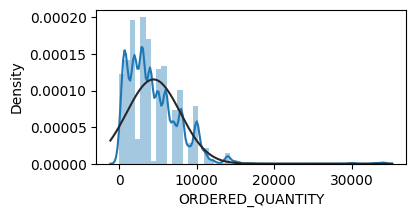

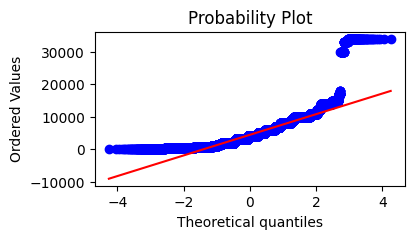

In [9]:
rcParams['figure.figsize'] = 4,2
sns.distplot(df['ORDERED_QUANTITY'], fit=norm)
#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['ORDERED_QUANTITY'], plot=plt)
plt.show()

In [10]:
df1 = df.drop(['COMPARTMENT_ID','PDXR_AUTHORIZATION_UNITS','MEASURED_QUANTITY_TYPE','COMMITTED_CONV_COE','COMMITTED_CONV_PRESSURE',
               'INVENTORY_QUANTITY_TYPE','DERIVED_VALUES_DIRECTIVE','ADJUSTMENT_BATCH','COMMODITY_GROUP','CALCULATE_NET',
               'DERIVATION_STATUS','TOTAL_BATCH_BLEND_NET_VOLUME','PRESSURE','NON_RECIPE_WEIGHT_IN_VAC','BLEND_CORRECTION_METHOD',
               'BLEND_CORRECTION_NET_VOLUME','BLEND_CORRECTION_SOURCE','ORDER_ID','ORDER_RECIPE_ID','API_CODE','HOST_PRODUCT_CODE',
               'PDXR_ADDITIVE_CODE','PDXR_PRODUCT_CODE','REDUCED_PRODUCT_NUMBER','INJECTOR_PRESET_CODE','INJECTOR_CODE','BAY_CODE',
               'HOST_PRODUCT_NAME','PETROEX_COMPONENT_PRODUCT_CODE','FINAL_SCALE_INTERFACE_CODE','TARE_SCALE_INTERFACE_CODE','TANK_CODE',
               'METER_CODE','SHOST_SI_HOST_PRODUCT_NUMBER','THOST_TI_HOST_PRODUCT_NUMBER','LAST_MODIFIED','LAST_USER_NAME','METER_PRESET_CODE',
               'COMPARTMENT_OWNER_ID','COMPARTMENT_CONTAINER_CODE','COMPARTMENT_CONTAINER_TYPE','COMPARTMENT_NUMBER','PDXR_LOADING_REF',
               'DERIVED_VALUES_ERROR','BLEND_PERCENT','VRU_CODE','RT_INJECTOR_ALARM_COUNT','RATE','OVERRIDE_TEMPERATURE_ENABLE',
               'COMMITTED_WEIGHT_IN_AIR','COMMITTED_WEIGHT_IN_VAC','COMPATIBILITY_STATUS','NON_RECIPE_WEIGHT','BLEND_PERCENT',
               'COMMITTED_CONV_DENSITY','ADDITIVE_WEIGHT_IN_VAC','PRODUCT_WEIGHT_IN_VAC','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY',
               'NON_RECIPE_GROSS_QUANTITY','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY','NON_RECIPE_GROSS_QUANTITY','RECIPE_CORRECTION_TYPE',
               'COMPATIBILITY_STATUS','ADDITIVE_MASKING','CUSTOMER_NET_QUANTITY','DENSITY','NET_QUANTITY','WEIGHT','PRODUCT_TOLERANCE_STATUS',
               'SPECIFIC_GRAVITY','COEFFICIENT_EXPANSION','TEMPERATURE','RVP','PRODUCT_TOLERANCE_STATUS','TANK_INVENTORY_UPDATED','TOTALIZER_UPDATED',
               'FLUSH_STATUS','ADDITIVE_WEIGHT','PRODUCT_WEIGHT','BATCH_NUMBER','FRAC_END_GROSS_TOTALIZER','START_GROSS_TOTALIZER','END_GROSS_TOTALIZER',
               'START_NET_TOTALIZER','FROM_LEFT_ON_TRUCK','OBSERVED_DENSITY','COMPONENT_ID','CALCULATE_SECONDARY_UNITS','FRAC_START_GROSS_TOTALIZER',
               'TERMINAL_PRODUCT_TYPE','END_WEIGHT','START_WEIGHT','END_NET_TOTALIZER','OXYGEN','GROSS_QUANTITY','TERMINAL_PRODUCT_NUMBER','COMMITTED_CONV_TEMPERATURE',
               'COMMITTED_GROSS_QUANTITY','COMMITTED_NET_QUANTITY','END_TIME','ADDITIVE_QUANTITY','PRODUCT_QUANTITY'], axis=1)
df1

,PRODUCT_GROUP_CODE,SUPPLIER_NUMBER,ORDERED_QUANTITY,START_TIME
0,DSL,12,100,NaT
1,DSL,12,100,NaT
2,DSL,12,100,NaT
3,DSL,12,671,2021-09-24 14:21:46
4,DSL,12,100,NaT
...,...,...,...,...
65530,DSL,13,4000,2021-12-17 14:48:04
65531,DSL,13,10000,2021-12-17 14:50:18
65532,DSL,13,10000,2021-12-17 14:59:36
65533,DSL,1,8000,2021-12-17 14:35:17


In [11]:
df1 = df1[df1['ORDERED_QUANTITY'] != 0]

In [12]:
#df1['START_TIME'] = pd.to_datetime(df1['START_TIME']).astype(int)

In [13]:
print(df1.isnull().any()> 0)

PRODUCT_GROUP_CODE    False
SUPPLIER_NUMBER       False
ORDERED_QUANTITY      False
START_TIME             True
dtype: bool


<Axes: >

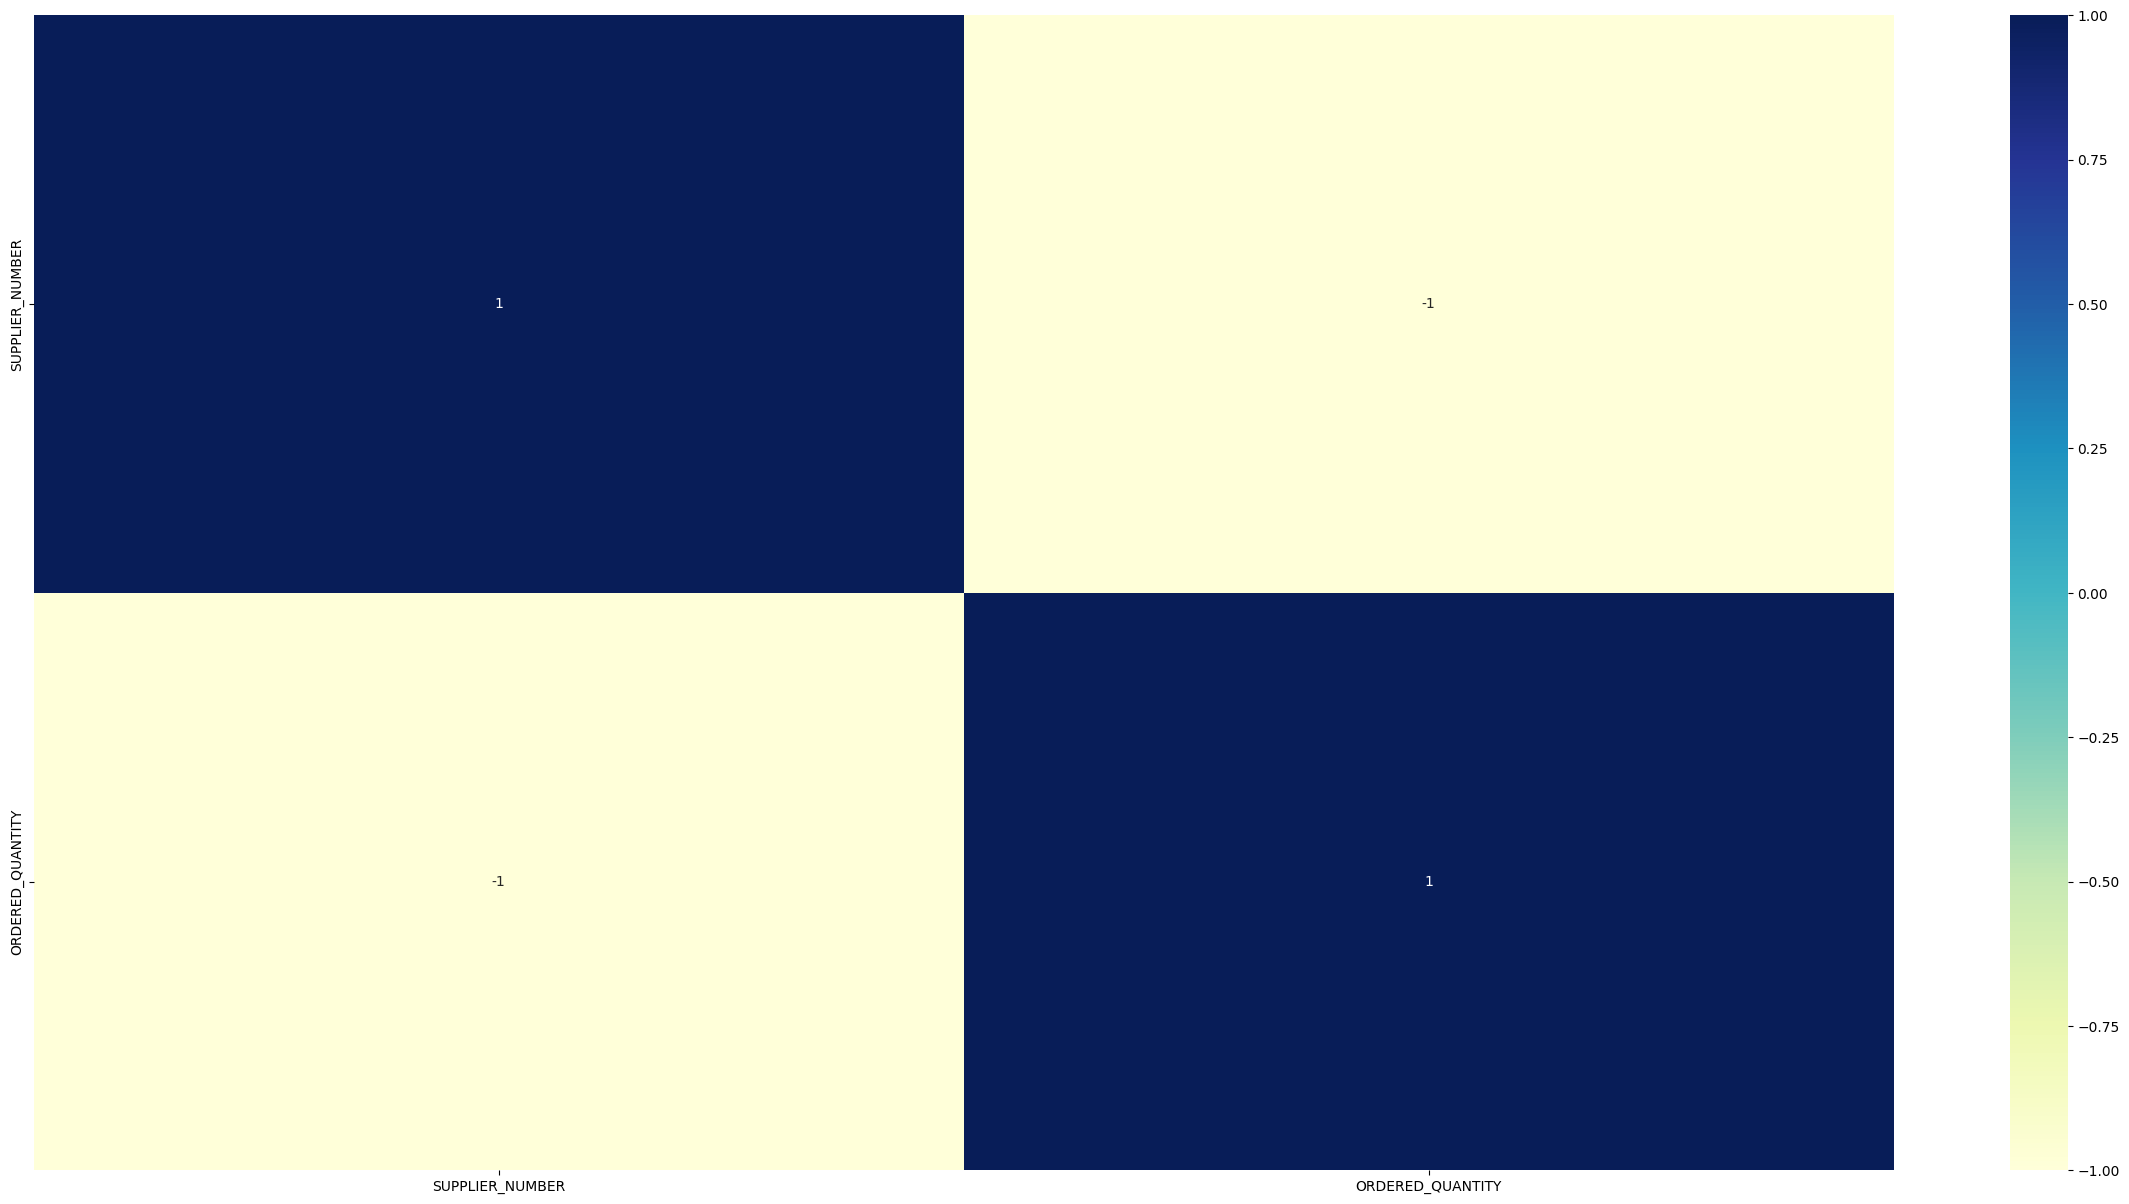

In [14]:
numeric_columns = df1.select_dtypes(include=['number']).columns
corr_matrix = df1[numeric_columns].corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix.corr(), annot=True, cmap="YlGnBu")

In [15]:
df1 = df1.drop_duplicates()
print(f"Number of duplicate rows: {df1.duplicated().sum()}")

Number of duplicate rows: 0


In [16]:
#Lets check the Orders by Product Category.
rcParams['figure.figsize'] = 50,12

#Taking subset of data temporarily for in memory compute.⅖
df_temp = df1.sample(n=60000).reset_index()
df_temp['log_ordered_quantity']= np.log1p(df_temp['ORDERED_QUANTITY'])

# Create a boxplot of log ordered quantity by product group code
fig5 = sns.boxplot(
    x="PRODUCT_GROUP_CODE",
    y="log_ordered_quantity",
    data=df_temp,
    order=df_temp['PRODUCT_GROUP_CODE'].sort_values().unique(),)

# Delete temporary dataframe and figure
del df_temp, fig5

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
df1['START_TIME'].value_counts().sort_values(ascending = False)

In [ ]:
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
print(missing_percentage[missing_percentage > 0])

In [ ]:
df1.info()

In [ ]:
# Forward Fill: fill missing dates with the last observed value
df1['START_TIME'] = df1['START_TIME'].fillna(method='ffill')

In [ ]:
df1['START_TIME'] = df1['START_TIME'].dt.date

In [ ]:
df1 = df1.dropna(subset=['START_TIME'])

In [ ]:
grp=df1['PRODUCT_GROUP_CODE']
# change the PRODUCT_GROUP_CODE column
grp1 = grp.replace({ 'DSL' : 0, 'ADD' : 1 ,'GAS': 2})
# put the new PRODUCT_GROUP_CODE column back
df1['PRODUCT_GROUP_CODE']=grp1

In [ ]:
df1.sort_values('START_TIME', inplace=True)
df1['SUPPLIER_NUMBER'].unique()

In [ ]:
df1['PRODUCT_GROUP_CODE'].unique()

In [ ]:
print(df1.isnull().any()> 0)

In [ ]:
df1['START_TIME'] = pd.to_numeric(df1['START_TIME'],errors='coerce')

In [ ]:
df1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Round 'START_TIME' to the nearest week (without considering hours)
df1['START_TIME'] = df1['START_TIME'].dt.to_period('W').dt.to_timestamp()

# Format 'START_TIME' to display only month and day
df1['START_TIME'] = df1['START_TIME'].dt.strftime('%Y-%m-%d')

# Group by 'PRODUCT_GROUP_CODE', resample to a larger time interval (weekly), and sum the quantities
grouped = df1.groupby(['PRODUCT_GROUP_CODE', 'START_TIME'])['ORDERED_QUANTITY'].sum()

# Plot each group
fig, ax = plt.subplots(figsize=(12, 7))
for name, group in grouped.groupby(level=0):  # Iterate over groups
    group.plot(ax=ax, label=name)

plt.title('Ordered Quantity Over Time by Product Group Code')
plt.xlabel('Date (Year-Month-Day)')
plt.ylabel('Ordered Quantity')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'START_TIME' is in datetime format
df1['START_TIME'] = pd.to_datetime(df1['START_TIME'])

# Convert 'START_TIME' to a "Year-Month" string format
df1['START_TIME_YM'] = df1['START_TIME'].dt.strftime('%m-%Y')

# You don't need to set START_TIME_YM as an index for grouping in this case
# Group by 'PRODUCT_GROUP_CODE' and the new 'START_TIME_YM'
grouped = df1.groupby(['PRODUCT_GROUP_CODE', 'START_TIME_YM'])['ORDERED_QUANTITY'].sum().reset_index()

# Plot each group
fig, ax = plt.subplots(figsize=(12, 7))
# Unique product codes for legend
product_group_codes = grouped['PRODUCT_GROUP_CODE'].unique()

for product_code in product_group_codes:
    # Filter the grouped DataFrame for each product code
    group = grouped[grouped['PRODUCT_GROUP_CODE'] == product_code]
    ax.plot(group['START_TIME_YM'], group['ORDERED_QUANTITY'], label=product_code)

plt.title('Monthly Ordered Quantity by Product Group Code')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Ordered Quantity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [ ]:
# @title Ordered Quantity over Time

df1.plot.line(x='START_TIME', y='ORDERED_QUANTITY')

In [ ]:
# @title Ordered Quantity vs Product Group over Time

df1.groupby(['PRODUCT_GROUP_CODE', 'START_TIME'])['ORDERED_QUANTITY'].sum().unstack().plot(kind='area')

In [ ]:
# Define features and target variable
y = df1['ORDERED_QUANTITY']
X = df1.drop(['ORDERED_QUANTITY'], axis=1)

In [ ]:
# Split the data into training and testing sets
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

In [ ]:
# Model Training
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

In [ ]:
# Create a list of models and instantiation parameters
models = [
    AutoARIMA(season_length=24),
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),

    DOT(season_length=24)
]

In [ ]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=df1,
    models=models,
    freq='D', #freq='D' means daily frequency
    n_jobs=-1,
    fallback_model = SeasonalNaive(season_length=7)
)

In [ ]:
forecasts_df = sf.forecast(h=14, level=[90])

forecasts_df

In [ ]:
crossvaldation_df = sf.cross_validation(
    df=High,
    h=14,
    step_size=2,
    n_windows=14
  )
crossvaldation_df

In [ ]:
# Filter the dataset to only include the desired oil product categories
df_filtered = df1[df1['PRODUCT_GROUP_CODE'].isin(['GAS', 'DSL', 'ADD'])]

# Set the TIME column as the index
df_filtered.set_index('START_TIME', inplace=True)

# Plot the time series line graph
df_filtered.plot(x='START_TIME', y='ORDERED_QUANTITY', kind='line')

# Add axis labels
plt.xlabel('Time')
plt.ylabel('Ordered Quantity')

# Display the plot
plt.show()